In [78]:
import random
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
import gym
# from settings import PROJECT_ROOT

In [79]:
# pip install pyglet==1.2.4

This is a DQN Algorithm. As the algorithm mentions, it has experience replay function. This replay function is implemeted below, the q-values are calculated in Q- function. The q values are then called in the replay function. In the main function the after every timestep the values are stored for experience replay as {state, action, next state ,reward , done} as a tuple. This values are stored and the neural network is trained on them. 

In [80]:
class DQNA:
    def __init__(self, state_size, action_size):
        self.state = state_size
        self.action = action_size
        self.store_data = deque(maxlen=200000)
        print(self.store_data)
        self.gamma = 0.995    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.001
        self.epsilon_decay = 0.995
        self.learning_rate = 0.01
        self.nn_model = self.neural_net()
        self.target_nn = self.neural_net()
        self.ed = []

    def act(self, state):
        rand_var = np.random.rand()
        if rand_var <= self.epsilon:
            return random.randrange(self.action)
        action_v = self.nn_model.predict(state)
#         print("action_v",action_v)
        return np.argmax(action_v[0]) 
    
    def neural_net(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(256, input_dim = self.state, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(self.action, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
            
        return model

    def store(self, state, action, reward, next_state, done):
        self.store_data.append((state, action, reward, next_state, done))
#         print("Stored_data", self.store_data)
    
    def q_values(self, next_state, reward): 
#         print(next_state)
        q_update = np.amax(self.nn_model.predict(next_state)[0])
        q_update = self.gamma * q_update
        q_update = reward + q_update
        return q_update
        
    def replay(self, batch_size):
        sample_data = random.sample(self.store_data, batch_size)
#         sample_data = sample(range(self.store_data), batch_size)
        if len(self.store_data) < batch_size: 
            return
        for state, action, reward, next_state, done in sample_data:
            if done:
                q_update = reward
            if not done:
                q_update = self.q_values(next_state, reward)
            q_val = self.nn_model.predict(state)
#             print("q_val",q_val)
            q_val[0][action] = q_update
#             print("q_update",q_update)
            self.nn_model.fit(state, q_val, batch_size = batch_size, epochs=1, verbose=0)
        self.ed.append(self.epsilon)
        self.epsilon *= self.epsilon_decay
        self.epsilon = max(self.epsilon_min, self.epsilon)

    def save(self, name):
        self.model.save_weights(name)

# This cell is for Cartpole

4
2
deque([], maxlen=200000)
Mean 78.0
Ep 1/2000# Score:78.0
Mean 45.0
Ep 2/2000# Score:12.0
Mean 34.666666666666664
Ep 3/2000# Score:14.0
Mean 31.0
Ep 4/2000# Score:20.0
Mean 30.0
Ep 5/2000# Score:26.0
Mean 38.666666666666664
Ep 6/2000# Score:82.0
Mean 38.0
Ep 7/2000# Score:34.0
Mean 36.0
Ep 8/2000# Score:22.0
Mean 35.333333333333336
Ep 9/2000# Score:30.0
Mean 34.2
Ep 10/2000# Score:24.0
Mean 33.63636363636363
Ep 11/2000# Score:28.0
Mean 34.5
Ep 12/2000# Score:44.0
Mean 33.23076923076923
Ep 13/2000# Score:18.0
Mean 33.0
Ep 14/2000# Score:30.0
Mean 36.666666666666664
Ep 15/2000# Score:88.0
Mean 37.375
Ep 16/2000# Score:48.0
Mean 37.294117647058826
Ep 17/2000# Score:36.0
Mean 36.22222222222222
Ep 18/2000# Score:18.0
Mean 36.0
Ep 19/2000# Score:32.0
Mean 35.5
Ep 20/2000# Score:26.0
Mean 35.523809523809526
Ep 21/2000# Score:36.0
Mean 34.63636363636363
Ep 22/2000# Score:16.0
Mean 34.08695652173913
Ep 23/2000# Score:22.0
Mean 33.666666666666664
Ep 24/2000# Score:24.0
Mean 34.16
Ep 25/2000# 

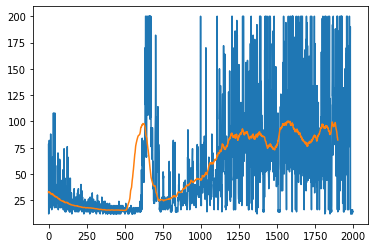

In [81]:
#######################################  CARTPOLE ###############################################################################
Episods = 2000
Rec_score = 195
env = gym.make('CartPole-v0')
obs_size = env.observation_space.shape[0]
print(obs_size)
action_size = env.action_space.n
print(action_size)
pole = DQNA(obs_size, action_size)
batch_size = 32
score = 0
com_score = []
ep = []
tmp = deque(maxlen = 100)
for epi in range(1, Episods): 
    state = env.reset()
    score = 0
#     print(state)
    state = np.reshape(state, [1, obs_size])
#     print(state)
    for i in range(1000):
#         env.render()
        action = pole.act(state)
        next_state, reward,done,info = env.step(action)
        next_state = np.reshape(next_state, [1,obs_size])
        if not done: 
            reward = reward
        if done:
            reward = -reward
        score = score + reward
        pole.store(state,action,reward,next_state, done)
        state = next_state
#         print(reward)
        score = score + reward
        if done == True:  
            break
#     time.sleep(1)
#     env.close()
    if score >= 200: 
        score = 200
    com_score.append(score)
    tmp.append(score)
    if epi > 99: 
        ep.append(np.mean(tmp))
    pole.replay(batch_size)
    print("Mean", np.mean(tmp))
    if (np.mean(tmp) > Rec_score): 
        print("solved at episode: ", epi," with avg: ", np.mean(tmp))
    print("Ep {}/{}# Score:{}".format(epi, Episods, score))
#     epi += 1 
fig = plt.figure(2)
plt.clf()
plt.plot(com_score)
plt.plot(ep)
plt.show()

For Mountain car, the rewards are given for small steps, this is to encourage the agent to take steps in certain direction and to maintain the average overtime. The rewards are smaller initially but they are incresed as the agent new states overtime, this looks works kinda cool that the agent actually start maximizing the rewards by staying the middle stage and finally moving to the final state.  After applying the Double DQN in another file, after 2000 iterations, the agent starts achieving goal for every episode. 

# This cell is for Mountain Car

2
3
deque([], maxlen=200000)
Mean -200.0
Ep 1/2000# Score:-200.0
Mean -200.0
Ep 2/2000# Score:-200.0
Mean -200.0
Ep 3/2000# Score:-200.0
Mean -200.0
Ep 4/2000# Score:-200.0
Mean -200.0
Ep 5/2000# Score:-200.0
Mean -200.0
Ep 6/2000# Score:-200.0
Mean -200.0
Ep 7/2000# Score:-200.0
Mean -200.0
Ep 8/2000# Score:-200.0
Mean -200.0
Ep 9/2000# Score:-200.0
Mean -200.0
Ep 10/2000# Score:-200.0
Mean -200.0
Ep 11/2000# Score:-200.0
Mean -200.0
Ep 12/2000# Score:-200.0
Mean -200.0
Ep 13/2000# Score:-200.0
Mean -200.0
Ep 14/2000# Score:-200.0
Mean -200.0
Ep 15/2000# Score:-200.0
Mean -200.0
Ep 16/2000# Score:-200.0
Mean -200.0
Ep 17/2000# Score:-200.0
Mean -200.0
Ep 18/2000# Score:-200.0
Mean -200.0
Ep 19/2000# Score:-200.0
Mean -200.0
Ep 20/2000# Score:-200.0
Mean -200.0
Ep 21/2000# Score:-200.0
Mean -200.0
Ep 22/2000# Score:-200.0
Mean -200.0
Ep 23/2000# Score:-200.0
Mean -200.0
Ep 24/2000# Score:-200.0
Mean -200.0
Ep 25/2000# Score:-200.0
Mean -200.0
Ep 26/2000# Score:-200.0
Mean -200.0
Ep 27/

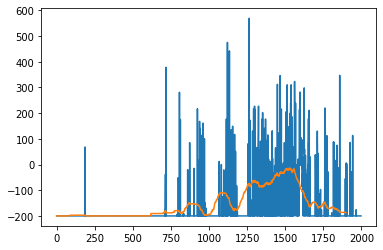

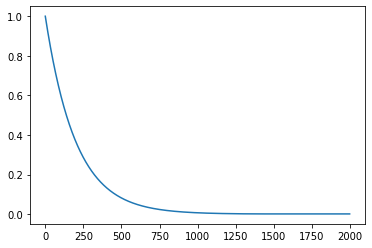

In [82]:
############################################# Mountain Car ########################################################
Episods = 2000
Rec_score = -120
env = gym.make('MountainCar-v0')
obs_size = env.observation_space.shape[0]
print(obs_size)
action_size = env.action_space.n
print(action_size)
pole = DQNA(obs_size, action_size)
batch_size = 128
score = 0
com_score = []
ep = []
tmp = deque(maxlen = 100)
for epi in range(1, Episods): 
    state = env.reset()
    score = 0
#     print(state)
    state = np.reshape(state, [1, obs_size])
#     print(state)
    for i in range(200):
#         env.render()
        action = pole.act(state)
        next_state, reward,done,info = env.step(action)
        next_state = np.reshape(next_state, [1,obs_size])
#         print("Next_state",next_state)
#         print("Next_state", next_state[0][0])
#         if (next_state[0][0] > Rec_score):
#             Rec_score = next_state[0][0]
        if next_state[0][0] >= 0.1:
            reward += 3
        if next_state[0][0] >= 0.25:
            reward += 10
#         if next_state[0][0] >= 0.3:
#             reward += 10
#             print("I want to go higher")
#         if next_state[0][0] >= 0.4 and  next_state[0][0] < 0.5:
#             reward += 7
#             print("All most there, can do better")
        if next_state[0][0] >= 0.5:
            reward += 15
#             print("Holy shit I never knew I would be rewarded this much, Thank you! (*Cries in happiness)")
        score = score + reward
#         if score >= 0: 
#             score = 0
        pole.store(state,action,reward,next_state, done)
        state = next_state
#         print(reward)
#         score = score + reward
        if done == True:  
            break
#     time.sleep(1)
#     env.close()
    com_score.append(score)
    tmp.append(score)
    if epi > 99: 
        ep.append(np.mean(tmp))
    pole.replay(batch_size)
    print("Mean", np.mean(tmp))
    if (np.mean(tmp) > Rec_score): 
        print("solved at episode: ", epi," with avg: ", np.mean(tmp))
    print("Ep {}/{}# Score:{}".format(epi, Episods, score))
#     epi += 1 
fig = plt.figure(1)
plt.clf()
plt.plot(com_score)
plt.plot(ep)
plt.show()
fig = plt.figure(2)
plt.plot(pole.ed)
